# **Predictive analytical model to detect patient appointment “No show” in scheduling Using Python**

## **Project Outline**

*  Problem Statement
*  Dataset Description
*  Libraries
*  Reading Dataset
*  Data Summary
*  Data Wrangling
*  Exploratory Data Analysis and Visualization
*  Data Preprocessing
*  Evaluating Different Classifiers With Default Parameters
*  Hyperparameter tuning
*  Summary
*  Future Work
*  References



## **Problem Statement**

Efficient use of available resources is a critical requirement that matters when assessing the success of hospitals. Especially when overcrowded, time slot for booking an appointment for events (eg. Diagnosis events, surgery events and Inpatient events) in a hospital becomes a serious problem, which can lead to delays in patient treatment. That can lead to lost patient treatment opportunities and losses. This scenario has resulted in the higher authorities having an efficient and reliable way to predict the No-Shows in patient appointment and making sure timeslot availability for patients. By predicting the 'No Show' rate for appointments, we can help our clients to save money, provide better care for their patients and reduce expenses on emergence care. 

## **Dataset Description**


 There are 150650 medical appointments and 31 associated variables (characteristics). 

**Variables**

 `AppointmentID`:         int64  : Appointment identifier
 
 `EventID`:               int64  : Event identifier
 
 `PatientIGUID`:          int64  : Patient database identifier
 
 `DateOfBirth`:           object : Patient's date of birth
 
 `Gender`:                object : Patient's Gender Male/Female
 
 `IDCode`:                int64  : Patient ID
 
 `Language`:              object : Patient's language
 
 `MaritalStatus`:         object : Patient's marital status
 
 `PrivacyStatus`:         float64: Patient's Privacy status
 
 `Race`:                  object : Patient's race
 
 `Religion`:              object : Patient's Religion
 
 `ClientVisitGUID`:       float64: Patient's visit identifier
 
 `AppointmentStatus`:     object : Appointment status Active/Completed/Waitlist/Cancelled
  
 `BookingIdentifier`:     int64  : Appointment Booking identifier
 
 `ScheduleCode`:          object : Scheduling code
 
 `ScheduledStartDtm`:     object : Appointment scheduled start date time
 
 `ScheduledEndDtm`:       object : Appointment scheduled end date time
 
 `StartDTM`:              object : Actual start date time
 
 `LocationGUID`:          int64  : Appointment Location identifier
 
 `CheckInDtm`:            object : Checkin date time of patient
 
 `CheckOutDtm`:           object : CheckOut date time of patient
 
 `ApptReminderStatusID`:  float64: Appointment reminder status identifier
 
 `IsTeleHealth`:          int64  : if the appointment is using telehealth 0/1
 
 `VisitID`:               float64: Patient visit number
 
 `VisitType`:             object : Patient visit type
 
 `AdmitDtm`:              object : Patient visit admit date time
 
 `DischargeDTM`:          object : Patient visit discharged date time
 
 `EventName`:             object : Appointment event name
 
 `EventDuration`:         int64  : Event duration
 
 `EventType`:             int64  : Event type

 **Target**

`IsArrived`:             int64  : Patient arrived or not


## **Libraries**

Install all libraries required, performing exploratory date analysis,visualization and modelling.


In [378]:
#for downdloading data 
import os
import opendatasets as od
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Python standard Libraries
from datetime import datetime

## **Reading Dataset**

In [379]:
appt_df = pd.read_csv('Appointment_RecordMinimum.csv')

In [380]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150650 entries, 0 to 150649
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AppointmentID         150650 non-null  int64  
 1   EventID               150650 non-null  int64  
 2   ClientGUID            150650 non-null  int64  
 3   DateOfBirth           150650 non-null  object 
 4   Gender                150650 non-null  object 
 5   IDCode                150650 non-null  int64  
 6   Language              150609 non-null  object 
 7   MaritalStatus         150614 non-null  object 
 8   PrivacyStatus         0 non-null       float64
 9   Race                  150614 non-null  object 
 10  Religion              88362 non-null   object 
 11  VisitGUID             149569 non-null  float64
 12  AppointmentStatus     150650 non-null  object 
 13  BookingIdentifier     150650 non-null  int64  
 14  ScheduleCode          150650 non-null  object 
 15  

## **Data Summary**

In [381]:
appt_df.head()

,AppointmentID,EventID,ClientGUID,DateOfBirth,Gender,IDCode,Language,MaritalStatus,PrivacyStatus,Race,...,CheckOutDtm,ApptReminderStatusID,IsTeleHealth,VisitIDCode,VisitType,AdmitDtm,DischargeDTM,EventName,EventDuration,EventType
0,3653756,941,100300200,3/5/1975,Female,1004,NaN,Single,NaN,White,...,NaN,4.0,0,2.000001e+13,Outpatient,13/11/2023 13:00,NaN,Nutrition Eval 45,45,0
1,3651433,935,271700200,22/10/2003,Male,2776,Cantonese,Unknown,NaN,Patient Declined,...,NaN,4.0,0,2.000001e+13,Outpatient,25/9/2023 14:30,NaN,Dietician Only 30,30,0
2,3650755,941,100300200,3/5/1975,Female,1004,NaN,Single,NaN,White,...,NaN,4.0,0,2.000001e+13,Outpatient,12/9/2023 13:45,NaN,Nutrition Eval 45,45,0
3,3648813,941,100300200,3/5/1975,Female,1004,NaN,Single,NaN,White,...,NaN,4.0,0,2.000001e+13,Outpatient,8/8/2023 10:15,NaN,Nutrition Eval 45,45,0
4,3648738,941,100300200,3/5/1975,Female,1004,NaN,Single,NaN,White,...,NaN,4.0,0,2.000001e+13,Outpatient,8/8/2023 10:15,NaN,Nutrition Eval 45,45,0


In [382]:
appt_df.shape


(150650, 31)

In [383]:
appt_df.columns

Index(['AppointmentID', 'EventID', 'ClientGUID', 'DateOfBirth', 'Gender',
       'IDCode', 'Language', 'MaritalStatus', 'PrivacyStatus', 'Race',
       'Religion', 'VisitGUID', 'AppointmentStatus', 'BookingIdentifier',
       'ScheduleCode', 'IsArrived', 'ScheduledStartDtm', 'ScheduledEndDtm',
       'StartDtm', 'LocationGUID', 'CheckInDtm', 'CheckOutDtm',
       'ApptReminderStatusID', 'IsTeleHealth', 'VisitIDCode', 'VisitType',
       'AdmitDtm', 'DischargeDTM', 'EventName', 'EventDuration', 'EventType'],
      dtype='object')

In [384]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150650 entries, 0 to 150649
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AppointmentID         150650 non-null  int64  
 1   EventID               150650 non-null  int64  
 2   ClientGUID            150650 non-null  int64  
 3   DateOfBirth           150650 non-null  object 
 4   Gender                150650 non-null  object 
 5   IDCode                150650 non-null  int64  
 6   Language              150609 non-null  object 
 7   MaritalStatus         150614 non-null  object 
 8   PrivacyStatus         0 non-null       float64
 9   Race                  150614 non-null  object 
 10  Religion              88362 non-null   object 
 11  VisitGUID             149569 non-null  float64
 12  AppointmentStatus     150650 non-null  object 
 13  BookingIdentifier     150650 non-null  int64  
 14  ScheduleCode          150650 non-null  object 
 15  

In [385]:
appt_df.nunique()

AppointmentID           150650
EventID                    288
ClientGUID               68336
DateOfBirth              21809
Gender                       3
IDCode                   68287
Language                    15
MaritalStatus                7
PrivacyStatus                0
Race                         6
Religion                    25
VisitGUID               128016
AppointmentStatus            6
BookingIdentifier       149819
ScheduleCode                 1
IsArrived                    2
ScheduledStartDtm        14652
ScheduledEndDtm          16829
StartDtm                 14652
LocationGUID               132
CheckInDtm               22558
CheckOutDtm              11233
ApptReminderStatusID         1
IsTeleHealth                 1
VisitIDCode             128016
VisitType                    7
AdmitDtm                 23627
DischargeDTM             11879
EventName                  288
EventDuration               10
EventType                    2
dtype: int64

In [386]:
appt_df.describe()

,AppointmentID,EventID,ClientGUID,IDCode,PrivacyStatus,VisitGUID,BookingIdentifier,IsArrived,LocationGUID,ApptReminderStatusID,IsTeleHealth,VisitIDCode,EventDuration,EventType
count,1.506500e+05,150650.000000,1.506500e+05,1.506500e+05,0.0,1.495690e+05,1.506500e+05,150650.000000,1.506500e+05,1140.0,150650.0,1.495690e+05,150650.000000,150650.000000
mean,3.499449e+06,959.372585,7.511953e+10,7.477685e+05,NaN,9.596703e+11,3.499243e+06,0.241288,2.468070e+08,4.0,0.0,6.779472e+08,17.381779,0.053402
std,1.655341e+05,310.478639,4.882898e+10,4.573723e+05,NaN,4.638174e+10,1.655055e+05,0.427866,7.423886e+07,0.0,0.0,1.156348e+11,10.427699,0.224834
min,2.147300e+04,1.000000,1.003002e+08,1.004000e+03,NaN,1.796113e+11,2.147300e+04,0.000000,6.350061e+07,4.0,0.0,1.837320e+06,5.000000,0.000000
25%,3.456136e+06,1000.000000,3.451040e+10,3.582560e+05,NaN,9.455935e+11,3.455761e+06,0.000000,2.163006e+08,4.0,0.0,9.223219e+06,10.000000,0.000000
50%,3.557802e+06,1003.000000,6.820720e+10,7.084630e+05,NaN,9.759037e+11,3.557490e+06,0.000000,2.303006e+08,4.0,0.0,9.516042e+06,15.000000,0.000000
75%,3.604386e+06,1089.000000,1.081481e+11,1.106835e+06,NaN,9.896861e+11,3.604245e+06,0.000000,2.563006e+08,4.0,0.0,9.649996e+06,20.000000,0.000000
max,3.653756e+06,1688.000000,1.655532e+11,1.525870e+06,NaN,1.003695e+12,3.653756e+06,1.000000,4.985006e+08,4.0,0.0,2.000001e+13,120.000000,1.000000


In [387]:
for col in appt_df.columns:
 print(f"{col} has {appt_df[col].nunique()} values\n")

AppointmentID has 150650 values

EventID has 288 values

ClientGUID has 68336 values

DateOfBirth has 21809 values

Gender has 3 values

IDCode has 68287 values

Language has 15 values

MaritalStatus has 7 values

PrivacyStatus has 0 values

Race has 6 values

Religion has 25 values

VisitGUID has 128016 values

AppointmentStatus has 6 values

BookingIdentifier has 149819 values

ScheduleCode has 1 values

IsArrived has 2 values

ScheduledStartDtm has 14652 values

ScheduledEndDtm has 16829 values

StartDtm has 14652 values

LocationGUID has 132 values

CheckInDtm has 22558 values

CheckOutDtm has 11233 values

ApptReminderStatusID has 1 values

IsTeleHealth has 1 values

VisitIDCode has 128016 values

VisitType has 7 values

AdmitDtm has 23627 values

DischargeDTM has 11879 values

EventName has 288 values

EventDuration has 10 values

EventType has 2 values



### **Observations**
The dataset has 150,650 row and 31 columns.

Total number of patients in the dataset are 68,336 
Aappointment ID are 150,650. 
There could be patients who made more than one appointments.

There are three `dtypes` in the dataset: float64- 1, int64-8 and object- 5. 
`ScheduledStartDtm`, `ScheduledEndDtm`, `StartDTM`, `CheckInDTM` and `CheckOutDTM` represent date and time. These will need to be formatted.

It is impossible to have useless columns, We will remove those from the dataset.

## **Data Wrangling**
We will do the following:



*  Check for duplicates
*  Remove invalid entry from BirthDate
*  Rename Column name 
*  Parse column with proper dtype
*  Create new columns 'Age'
*  Create new column 'Age_Group'
*  Create new column Patient_group for visualization 
*  Parse date columns




In [388]:
# checking for duplicated rows
appt_df.duplicated().sum()

0

No duplicate record found in dataset

In [389]:
appt_df.DateOfBirth.value_counts()

11/7/2003     95
16/4/1985     64
8/4/1913      58
21/5/2007     45
27/10/1971    44
              ..
16/3/2003      1
13/3/1990      1
19/5/2015      1
25/2/1910      1
18/2/1934      1
Name: DateOfBirth, Length: 21809, dtype: int64

No garbage record for date of birth found

In [390]:
#Rename column name
appt_df.rename(columns = {'ScheduledStartDtm':'AppointmentDate'}, inplace = True)

In [391]:
appt_df.rename(columns = {'ClientGUID':'PatientID'}, inplace = True)

In [392]:
#change dtype

appt_df['PatientID'] = appt_df['PatientID'].astype('int64')
appt_df['AppointmentID'] = appt_df['AppointmentID'].astype('int64')
appt_df['EventID'] = appt_df['EventID'].astype('int64')
appt_df['AppointmentStatus'] = appt_df['AppointmentStatus'].astype('category')
appt_df['DateOfBirth'] = pd.to_datetime(appt_df['DateOfBirth'], format='%d/%m/%Y')
appt_df['AppointmentDate'] = pd.to_datetime(appt_df['AppointmentDate'], format='%d/%m/%Y %H:%M')
#appt_df['AppointmentDate'] = appt_df['AppointmentDate'].dt.date
appt_df['ScheduledEndDtm'] = pd.to_datetime(appt_df['ScheduledEndDtm'], format='%d/%m/%Y %H:%M')
appt_df['Gender'] = appt_df['Gender'].astype('category')
appt_df['LocationGUID'] = appt_df['LocationGUID'].astype('int64')

In [393]:
# create age group column
current_date = datetime.now()
appt_df['Age'] = (current_date - appt_df['DateOfBirth']) // pd.Timedelta(days=365)


In [394]:
appt_df.columns

Index(['AppointmentID', 'EventID', 'PatientID', 'DateOfBirth', 'Gender',
       'IDCode', 'Language', 'MaritalStatus', 'PrivacyStatus', 'Race',
       'Religion', 'VisitGUID', 'AppointmentStatus', 'BookingIdentifier',
       'ScheduleCode', 'IsArrived', 'AppointmentDate', 'ScheduledEndDtm',
       'StartDtm', 'LocationGUID', 'CheckInDtm', 'CheckOutDtm',
       'ApptReminderStatusID', 'IsTeleHealth', 'VisitIDCode', 'VisitType',
       'AdmitDtm', 'DischargeDTM', 'EventName', 'EventDuration', 'EventType',
       'Age'],
      dtype='object')

In [395]:
appt_df.head()

,AppointmentID,EventID,PatientID,DateOfBirth,Gender,IDCode,Language,MaritalStatus,PrivacyStatus,Race,...,ApptReminderStatusID,IsTeleHealth,VisitIDCode,VisitType,AdmitDtm,DischargeDTM,EventName,EventDuration,EventType,Age
0,3653756,941,100300200,1975-05-03,Female,1004,NaN,Single,NaN,White,...,4.0,0,2.000001e+13,Outpatient,13/11/2023 13:00,NaN,Nutrition Eval 45,45,0,48
1,3651433,935,271700200,2003-10-22,Male,2776,Cantonese,Unknown,NaN,Patient Declined,...,4.0,0,2.000001e+13,Outpatient,25/9/2023 14:30,NaN,Dietician Only 30,30,0,19
2,3650755,941,100300200,1975-05-03,Female,1004,NaN,Single,NaN,White,...,4.0,0,2.000001e+13,Outpatient,12/9/2023 13:45,NaN,Nutrition Eval 45,45,0,48
3,3648813,941,100300200,1975-05-03,Female,1004,NaN,Single,NaN,White,...,4.0,0,2.000001e+13,Outpatient,8/8/2023 10:15,NaN,Nutrition Eval 45,45,0,48
4,3648738,941,100300200,1975-05-03,Female,1004,NaN,Single,NaN,White,...,4.0,0,2.000001e+13,Outpatient,8/8/2023 10:15,NaN,Nutrition Eval 45,45,0,48


In [396]:
# confirm changes
appt_df.Age.describe()

count    150650.000000
mean         52.085682
std          18.887691
min         -10.000000
25%          40.000000
50%          55.000000
75%          66.000000
max         118.000000
Name: Age, dtype: float64

In [397]:
appt_df = appt_df.query("Age > 0")

In [398]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149985 entries, 0 to 150649
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   AppointmentID         149985 non-null  int64         
 1   EventID               149985 non-null  int64         
 2   PatientID             149985 non-null  int64         
 3   DateOfBirth           149985 non-null  datetime64[ns]
 4   Gender                149985 non-null  category      
 5   IDCode                149985 non-null  int64         
 6   Language              149944 non-null  object        
 7   MaritalStatus         149949 non-null  object        
 8   PrivacyStatus         0 non-null       float64       
 9   Race                  149949 non-null  object        
 10  Religion              88238 non-null   object        
 11  VisitGUID             148904 non-null  float64       
 12  AppointmentStatus     149985 non-null  category      
 13 

In [399]:
# create age group column
appt_df['Age_group'] = pd.cut(x=appt_df['Age'], bins=[0,10,20,30,40,50,60,70,80,90,100,110])



In [400]:
# confirm changes
appt_df.Age.describe()

count    149985.000000
mean         52.329960
std          18.568438
min           1.000000
25%          40.000000
50%          55.000000
75%          66.000000
max         118.000000
Name: Age, dtype: float64

In [401]:
appt_df.Gender.value_counts()

Female     87242
Male       62572
Unknown      171
Name: Gender, dtype: int64

In [402]:
#Unknown records are very minimum, would not impact much on model, remove those records
appt_df = appt_df.query("Gender != 'Unknown'")

In [403]:
appt_df['Gender'] = appt_df['Gender'].cat.codes

In [404]:
appt_df.Gender.value_counts()

0    87242
1    62572
Name: Gender, dtype: int64

In [405]:
appt_df1 = appt_df.copy()

In [406]:
appt_df.head()

,AppointmentID,EventID,PatientID,DateOfBirth,Gender,IDCode,Language,MaritalStatus,PrivacyStatus,Race,...,IsTeleHealth,VisitIDCode,VisitType,AdmitDtm,DischargeDTM,EventName,EventDuration,EventType,Age,Age_group
0,3653756,941,100300200,1975-05-03,0,1004,NaN,Single,NaN,White,...,0,2.000001e+13,Outpatient,13/11/2023 13:00,NaN,Nutrition Eval 45,45,0,48,"(40, 50]"
1,3651433,935,271700200,2003-10-22,1,2776,Cantonese,Unknown,NaN,Patient Declined,...,0,2.000001e+13,Outpatient,25/9/2023 14:30,NaN,Dietician Only 30,30,0,19,"(10, 20]"
2,3650755,941,100300200,1975-05-03,0,1004,NaN,Single,NaN,White,...,0,2.000001e+13,Outpatient,12/9/2023 13:45,NaN,Nutrition Eval 45,45,0,48,"(40, 50]"
3,3648813,941,100300200,1975-05-03,0,1004,NaN,Single,NaN,White,...,0,2.000001e+13,Outpatient,8/8/2023 10:15,NaN,Nutrition Eval 45,45,0,48,"(40, 50]"
4,3648738,941,100300200,1975-05-03,0,1004,NaN,Single,NaN,White,...,0,2.000001e+13,Outpatient,8/8/2023 10:15,NaN,Nutrition Eval 45,45,0,48,"(40, 50]"


## **Exploratory Data Analysis and Visualization**

### **Distribution of individual features**

In [407]:
#variables for visualization
Age = appt_df.Age
Gender= appt_df.Gender


### Age

What is the distribution of age among those who make appointments?

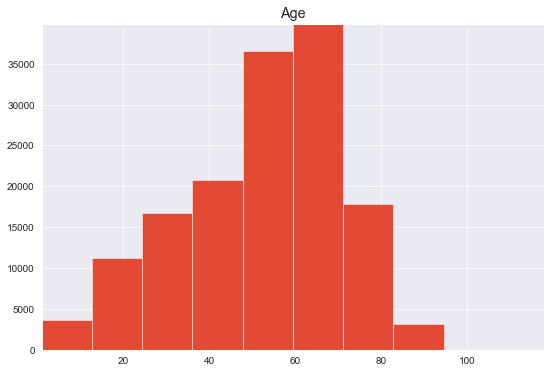

In [408]:
plt.figure(figsize=(9,6))
plt.hist(Age, bins=10)
plt.title('Age')
plt.margins(0)
plt.show()

Most of the appointments are from 20-80 years old patient. There are less records for persons under 20 and above the age of 80 years. 

### Gender

Who make most appointments, males or females?

In [409]:
Gender.value_counts(normalize= True)

0    0.582335
1    0.417665
Name: Gender, dtype: float64

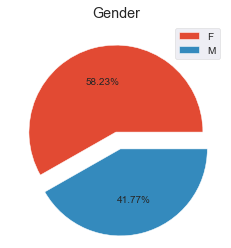

In [410]:
plt.pie(Gender.value_counts(), explode=[0,0.2], autopct='%1.2f%%')
plt.legend(labels=['F','M'])
plt.title('Gender')
plt.show()

There are more Females than males who book medical appointments.

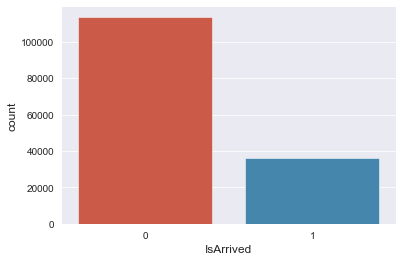

In [411]:
#plot the outcome values
sns.countplot(x='IsArrived', data=appt_df)
plt.show()

### **Features Relationships**

### Age vs No-show (IsArrived=0) 

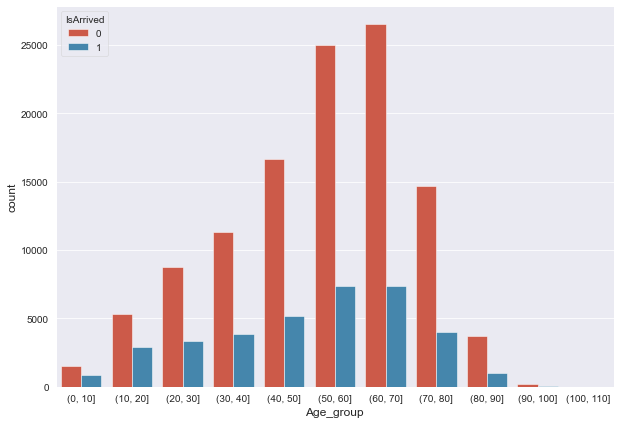

In [412]:
plt.figure(figsize=(10,7))
sns.countplot(x=appt_df['Age_group'],hue = appt_df['IsArrived']);

## **Data Preprocessing**

### **Input and Target Columns**

In [413]:
appt_df1 = appt_df.copy()
# In initial analysis it seems that
# We can also remove 'Race', 'ClientVisitGUID', 'CheckInDtm', 'CheckOutDtm', 'VisitID', 'VisitType', 'AdmitDtm', 'DischargeDTM', ApptReminderStatusID, IsTeleHealth, EventType, OverBookingLimit, MaritalStatus, PrivacyStatus, Religion, 
#as all are having only 1 or 2 value respectively, so these will not impact the outcome of No-Show. So we will drop these columns.
appt_df1 = appt_df1.drop(['ScheduledEndDtm', 'BookingIdentifier','EventName', 'Race', 'CheckInDtm', 'CheckOutDtm',  'VisitType', 'AdmitDtm', 'DischargeDTM','ApptReminderStatusID', 'IsTeleHealth', 'EventType', 'MaritalStatus', 'PrivacyStatus', 'Religion'], axis=1)


In [414]:
appt_df1.columns

Index(['AppointmentID', 'EventID', 'PatientID', 'DateOfBirth', 'Gender',
       'IDCode', 'Language', 'VisitGUID', 'AppointmentStatus', 'ScheduleCode',
       'IsArrived', 'AppointmentDate', 'StartDtm', 'LocationGUID',
       'VisitIDCode', 'EventDuration', 'Age', 'Age_group'],
      dtype='object')

In [415]:
appt_df1.dtypes

AppointmentID                 int64
EventID                       int64
PatientID                     int64
DateOfBirth          datetime64[ns]
Gender                         int8
IDCode                        int64
Language                     object
VisitGUID                   float64
AppointmentStatus          category
ScheduleCode                 object
IsArrived                     int64
AppointmentDate      datetime64[ns]
StartDtm                     object
LocationGUID                  int64
VisitIDCode                 float64
EventDuration                 int64
Age                           int64
Age_group                  category
dtype: object

In [416]:
# We can delete cancelled appointment from the list, because those are neither completed nor a noshow
appt_df1 = appt_df1.query("AppointmentStatus != 'CANCELLED'")

In [417]:
# We can delete waitlist appointment from the list, because those are neither completed nor a noshow
appt_df1 = appt_df1.query("AppointmentStatus != 'WAITLIST'")

In [418]:
appt_df1.AppointmentStatus.value_counts()

ACTIVE        76964
COMPLETE      34866
ACTIVE          826
WAITLIST         74
CANCELLED         0
WAITLIST          0
Name: AppointmentStatus, dtype: int64

In [419]:
# There are two Waitlist and two Active statuses in appointmentstatus column, 
# Normalize them
# AppointmentStatus = WAITLIST is still there in dataset
appt_df1 = appt_df1[~appt_df1['AppointmentStatus'].str.startswith('WAITL')]

In [420]:
#Set Active to all active appointmentstatuses

# Set column value as "Active" where it starts with "act"
appt_df1.loc[appt_df1['AppointmentStatus'].str.startswith('ACT'), 'AppointmentStatus'] = 'ACTIVE'

In [421]:
#Verify records

appt_df1.AppointmentStatus.value_counts()

ACTIVE        77790
COMPLETE      34866
ACTIVE            0
CANCELLED         0
WAITLIST          0
WAITLIST          0
Name: AppointmentStatus, dtype: int64

In [422]:
appt_df1['AppointmentStatus'] = appt_df1['AppointmentStatus'].cat.codes

In [423]:
appt_df1.AppointmentStatus.value_counts()

0    77790
3    34866
Name: AppointmentStatus, dtype: int64

In [424]:
appt_df1.Age.value_counts()

62     2816
61     2766
63     2728
65     2667
58     2635
       ... 
96        7
98        3
97        2
113       1
116       1
Name: Age, Length: 100, dtype: int64

In [425]:
appt_df1.isnull().sum()


AppointmentID          0
EventID                0
PatientID              0
DateOfBirth            0
Gender                 0
IDCode                 0
Language              19
VisitGUID            811
AppointmentStatus      0
ScheduleCode           0
IsArrived              0
AppointmentDate        0
StartDtm               0
LocationGUID           0
VisitIDCode          811
EventDuration          0
Age                    0
Age_group              2
dtype: int64

In [426]:
# Just wants to check if all IsArrived=0 are with active status or not
appt_df1_NotArrived = appt_df1.query("IsArrived == 0")


In [427]:
appt_df1_NotArrived.AppointmentStatus.value_counts()

0    76987
Name: AppointmentStatus, dtype: int64

In the dataset, all active appointment statuses with IsArrived = 0, are No show appointments.

So here, in this dataset, we can easily said that if IsArrived is 0, it means it is a NoShow case

In [428]:
#%%time
appt_df2 = appt_df1.copy()
appt_df1=appt_df1.sort_values(by='AppointmentDate')
appt_df1 = appt_df1.sort_values(["PatientID","AppointmentDate"])
#no_show_rates = []
show_scores = []

last_shows = []
appts_counts = []
appts_lasts = []

for pat in appt_df1["PatientID"].unique():
    dfx = appt_df1[appt_df1["PatientID"] == pat]
    # if isArrived = 1, means patient arrived
    patient_show = list(dfx["IsArrived"])
    
    #no_show_rate = [0]
    show_rate = [0]

    appts_last = [0]
    for i in range(1,len(dfx)):
        rate_so_far = round((np.sum(patient_show[0:i]) / i),1)
        show_rate.append(rate_so_far)
        
        # appointments since last appointment
        dates_list = list(dfx["AppointmentDate"])
        appt_diff = (dates_list[i] - dates_list[i-1]).days
        appts_last.append(appt_diff)
        
    # appointment count
    appts_count = []
    for i in range(0,len(dfx)):
        appts = i+1
        appts_count.append(appts)
        
    show_scores.extend(show_rate)
    appts_counts.extend(appts_count)
    appts_lasts.extend(appts_last)
    
    # last show
    last_show = []
    last_show = patient_show[-1]
    last_shows.extend(last_show)   

appt_df1["AvailablityScores"] = show_scores
appt_df1["LastShowStatus"] = last_shows
appt_df1["AppointmentCount"] = appts_counts
appt_df1["LastAppointmentDays"] = appts_lasts

appt_df1.head()

,AppointmentID,EventID,PatientID,DateOfBirth,Gender,IDCode,Language,VisitGUID,AppointmentStatus,ScheduleCode,...,StartDtm,LocationGUID,VisitIDCode,EventDuration,Age,Age_group,AvailablityScores,LastShowStatus,AppointmentCount,LastAppointmentDays
4,3648738,941,100300200,1975-05-03,0,1004,NaN,1.002790e+12,0,S,...,8/8/2023 9:30,99100610,2.000001e+13,45,48,"(40, 50]",0.0,0,1,0
3,3648813,941,100300200,1975-05-03,0,1004,NaN,1.002790e+12,0,S,...,8/8/2023 10:15,99100610,2.000001e+13,45,48,"(40, 50]",0.0,0,2,0
2,3650755,941,100300200,1975-05-03,0,1004,NaN,1.003133e+12,0,S,...,12/9/2023 13:45,99100610,2.000001e+13,45,48,"(40, 50]",0.0,0,3,35
0,3653756,941,100300200,1975-05-03,0,1004,NaN,1.003695e+12,0,S,...,13/11/2023 13:00,99100610,2.000001e+13,45,48,"(40, 50]",0.0,0,4,61
110647,3466193,1025,108800200,2001-05-09,1,1091,English,9.564212e+11,0,S,...,9/11/2021 9:20,222900610,9.327942e+06,20,22,"(20, 30]",0.0,0,1,0


In [429]:
appt_df1 = appt_df1.drop(['DateOfBirth','AppointmentDate','Language','VisitGUID', 'StartDtm', 'ScheduleCode','VisitIDCode'], axis=1)

In [430]:
appt_df1.columns

Index(['AppointmentID', 'EventID', 'PatientID', 'Gender', 'IDCode',
       'AppointmentStatus', 'IsArrived', 'LocationGUID', 'EventDuration',
       'Age', 'Age_group', 'AvailablityScores', 'LastShowStatus',
       'AppointmentCount', 'LastAppointmentDays'],
      dtype='object')

In [431]:
appt_df1.AvailablityScores.value_counts()

0.0    72985
1.0    26534
0.5     6454
0.7     2181
0.3     1867
0.8      844
0.2      805
0.6      464
0.4      453
0.1       47
0.9       22
Name: AvailablityScores, dtype: int64

In [432]:
inputs = ['Gender', 'Age']
target = 'IsArrived'

In [433]:
# Separate input and target data
X = appt_df1[inputs].copy()
y = appt_df1[target]

X.head()

,Gender,Age
4,0,48
3,0,48
2,0,48
0,0,48
110647,1,22


In [434]:
y.head()

4         0
3         0
2         0
0         0
110647    0
Name: IsArrived, dtype: int64

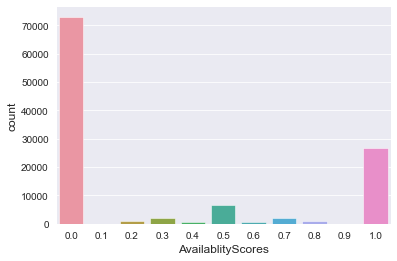

In [435]:
#plot the outcome values
sns.countplot(x='AvailablityScores', data=appt_df1)
plt.show()

This dataset has high unavailabily records

<Axes: xlabel='Gender', ylabel='AvailablityScores'>

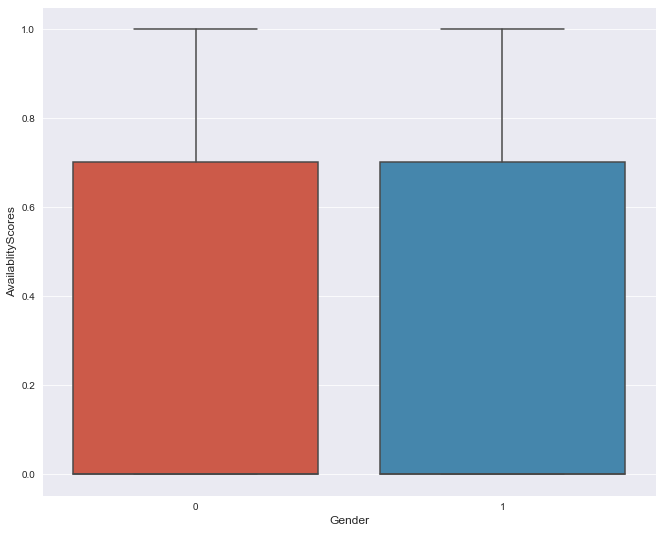

In [436]:
f, ax = plt.subplots(figsize=(11,9))
sns.boxplot(x="Gender", y="AvailablityScores",
            data=appt_df1)

<Axes: xlabel='Age_group', ylabel='AvailablityScores'>

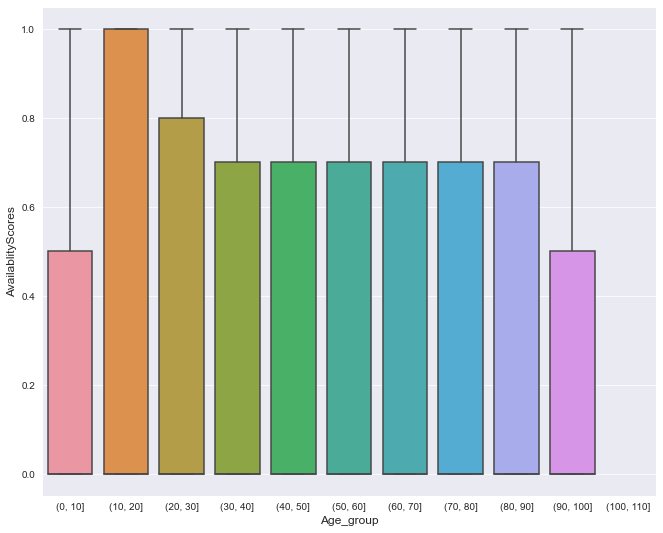

In [437]:
f, ax = plt.subplots(figsize=(11,9))
sns.boxplot(x="Age_group", y="AvailablityScores",
            data=appt_df1)

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(35, 20))

# Assuming the DataFrame is named 'appt_df1' and the age column is named 'Age'
filtered_df = appt_df1[(appt_df1['Age'] > 20) & (appt_df1['Age'] < 80)]


# Calculate the mean availability scores for each patient using pivot_table()
mean_scores = filtered_df.pivot_table(index='PatientID', values='IsArrived', aggfunc='mean')

# Plot the barplot using the mean scores
#sns.boxplot(x=mean_scores['AvailablityScores'], ax=ax)
sns.barplot(x=mean_scores.index, y=mean_scores['IsArrived'], ax=ax)

ax.set(ylim=(0, 20))
plt.xticks(rotation=90)
plt.show()
'''

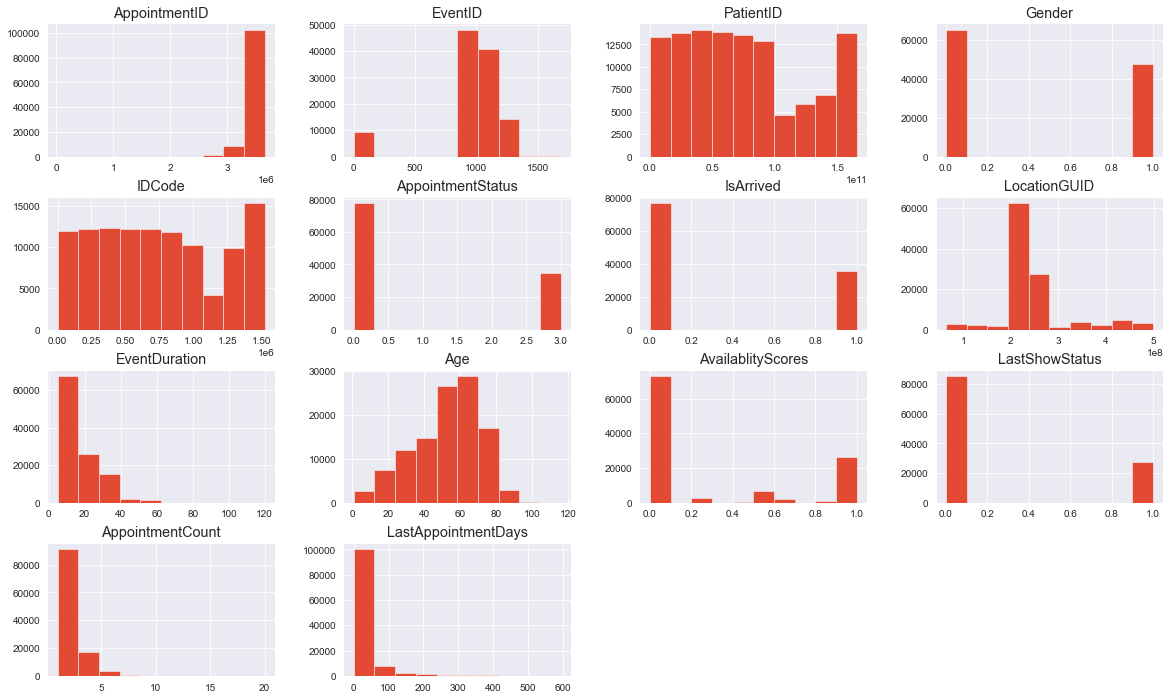

In [448]:
#Visualise the distribution of other independent variables as well.
appt_df1.hist(figsize=(20, 12))
plt.show()

<Axes: >

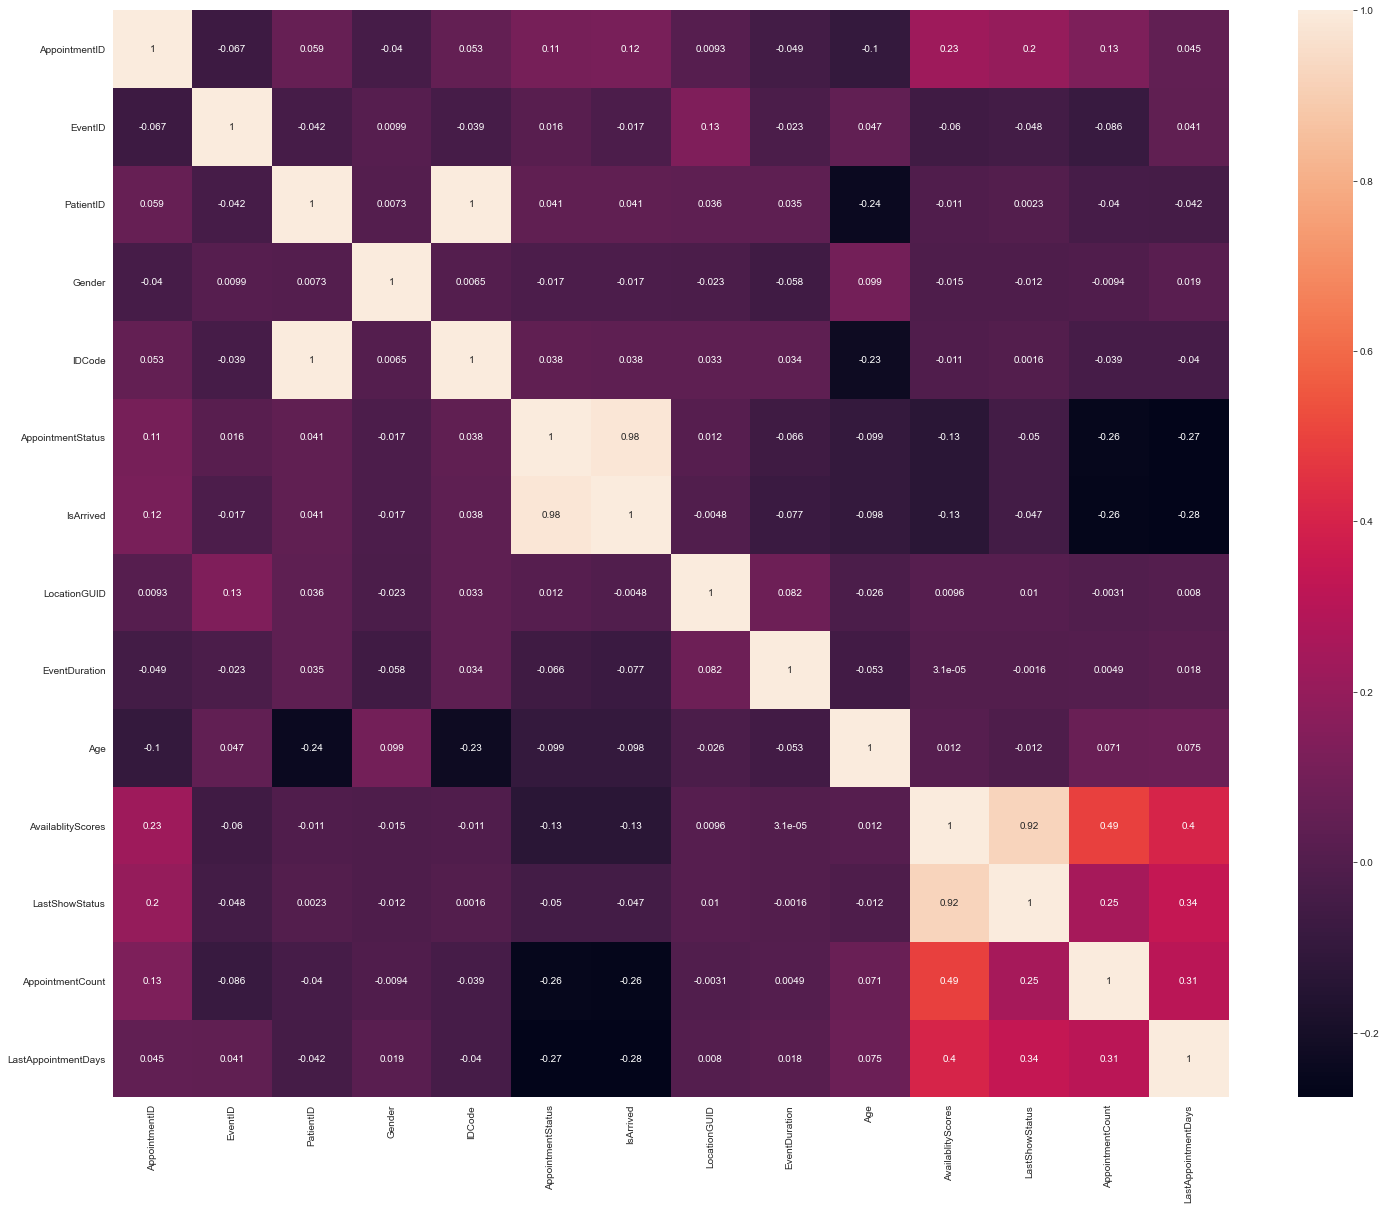

In [449]:
#corralation between each column
corr = appt_df1.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True)

We can see that the IsArrived and AppointmentStatus plays an important role determining the No-Show. 
Also, AvailabilityScores and LastShowStatus seems be the important characteristic to determine No-Show.

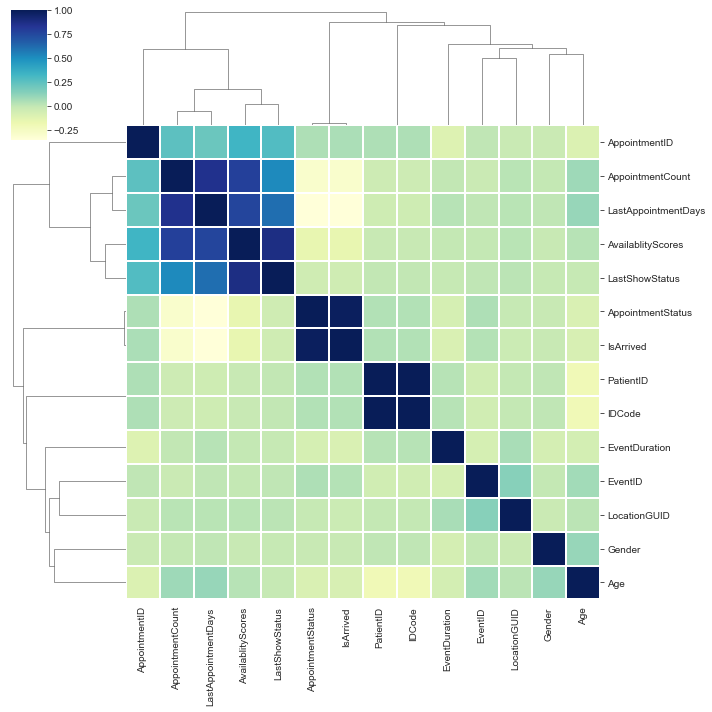

In [450]:
corrmat = appt_df1.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

AppointmentID             Axes(0.125,0.749828;0.133621x0.130172)
EventID                Axes(0.285345,0.749828;0.133621x0.130172)
PatientID               Axes(0.44569,0.749828;0.133621x0.130172)
Gender                 Axes(0.606034,0.749828;0.133621x0.130172)
IDCode                 Axes(0.766379,0.749828;0.133621x0.130172)
AppointmentStatus         Axes(0.125,0.593621;0.133621x0.130172)
IsArrived              Axes(0.285345,0.593621;0.133621x0.130172)
LocationGUID            Axes(0.44569,0.593621;0.133621x0.130172)
EventDuration          Axes(0.606034,0.593621;0.133621x0.130172)
Age                    Axes(0.766379,0.593621;0.133621x0.130172)
AvailablityScores         Axes(0.125,0.437414;0.133621x0.130172)
LastShowStatus         Axes(0.285345,0.437414;0.133621x0.130172)
AppointmentCount        Axes(0.44569,0.437414;0.133621x0.130172)
LastAppointmentDays    Axes(0.606034,0.437414;0.133621x0.130172)
dtype: object

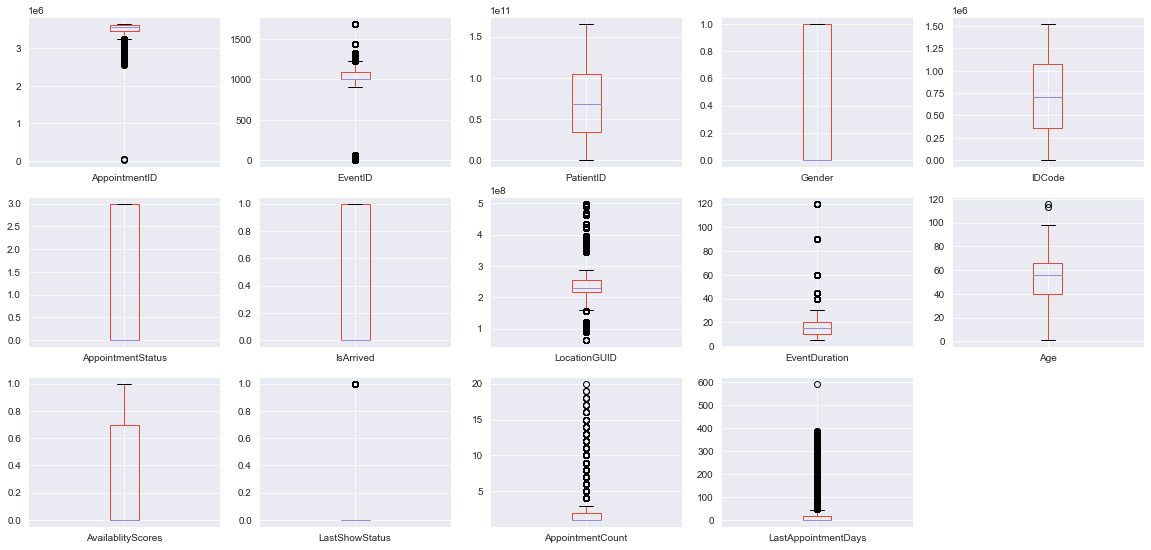

In [451]:
appt_df1.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,16))

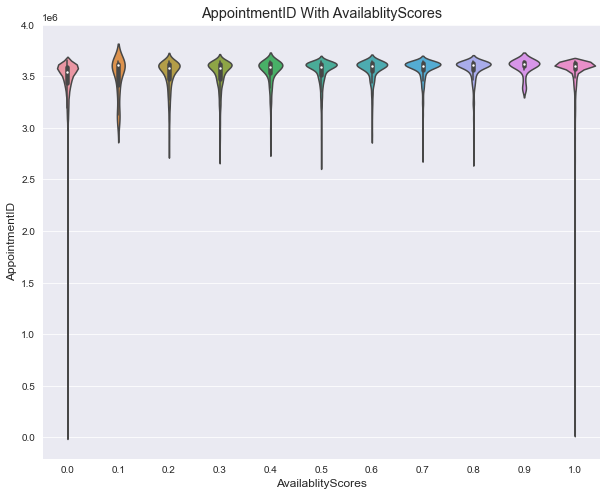

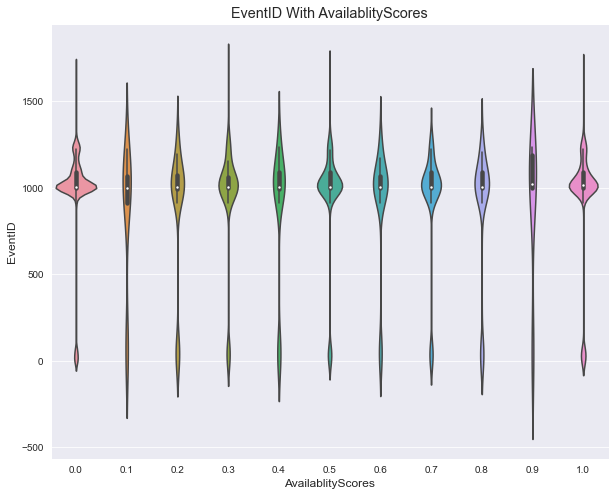

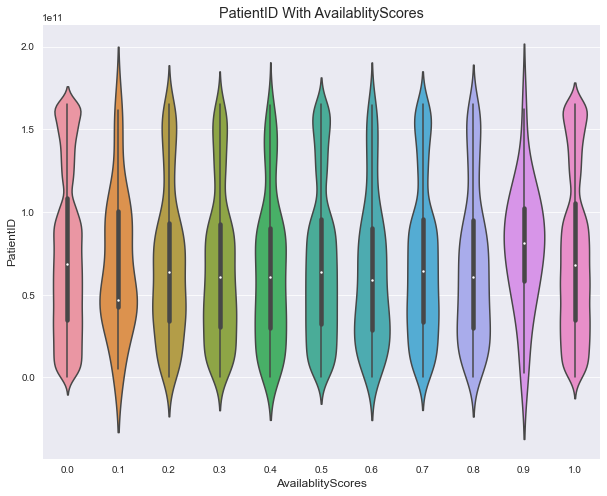

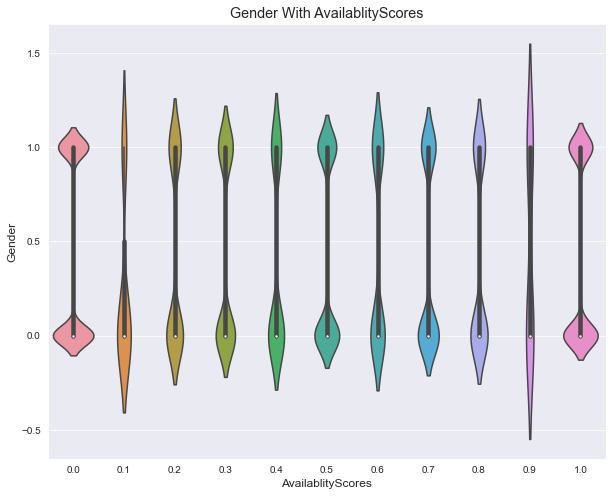

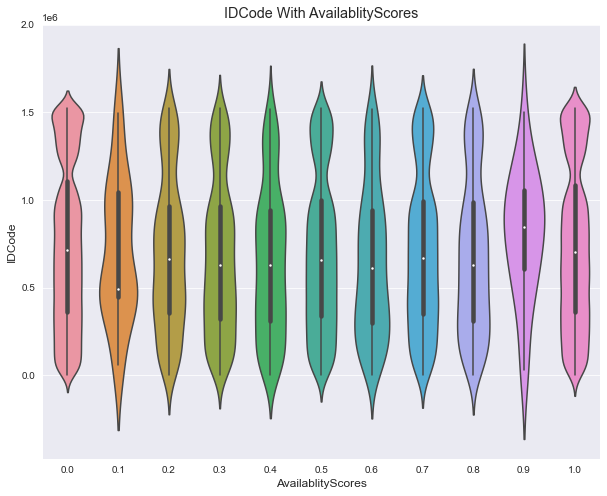

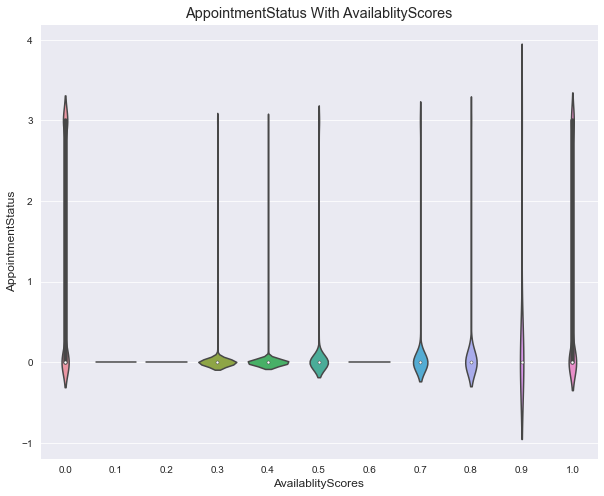

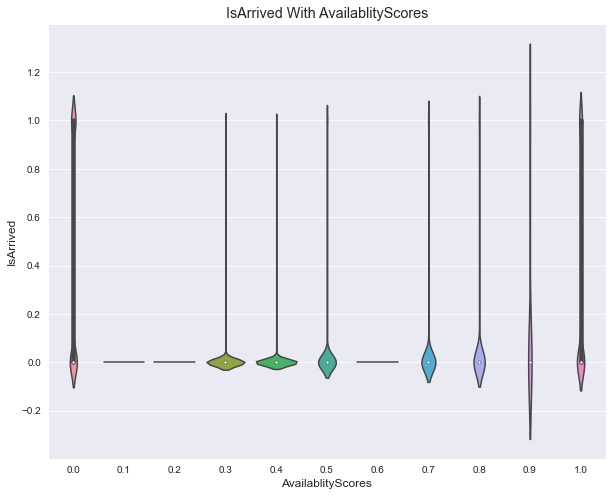

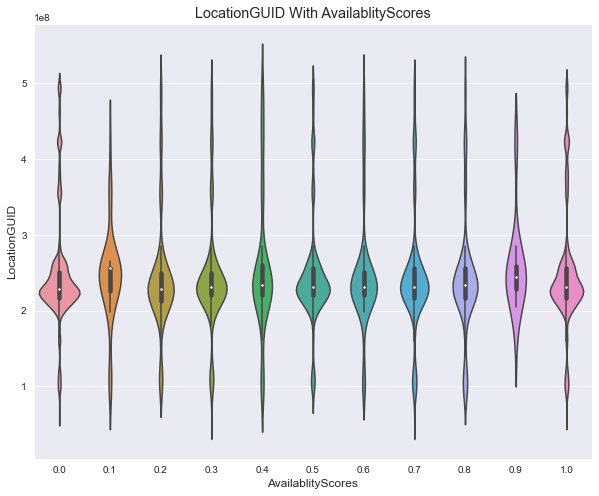

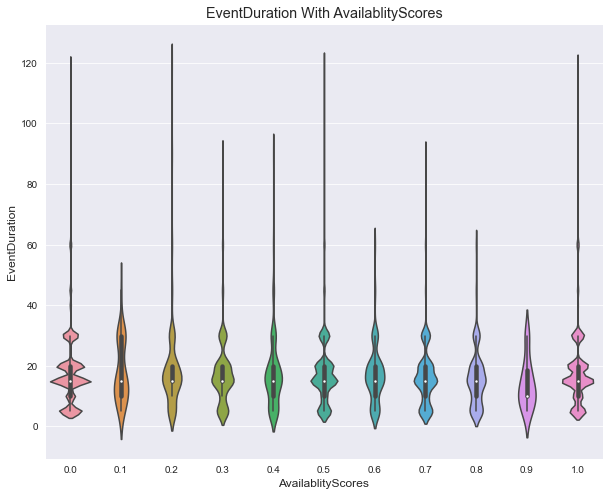

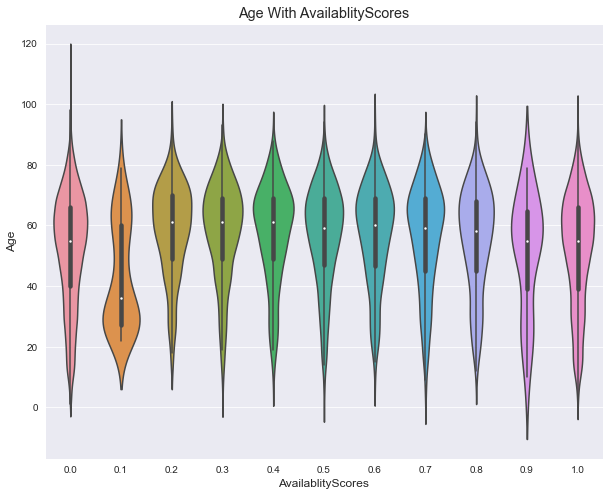

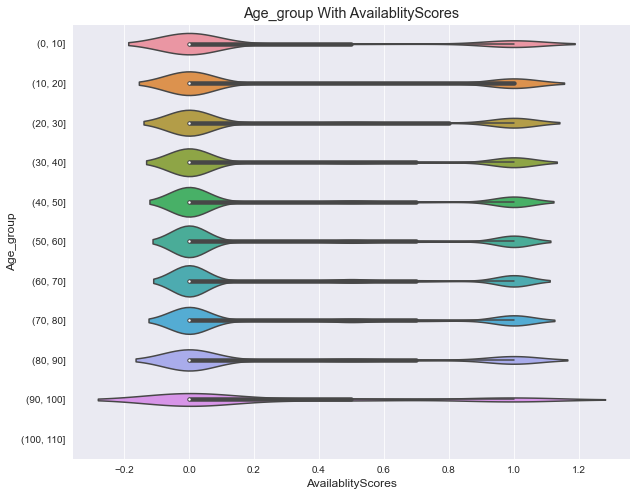

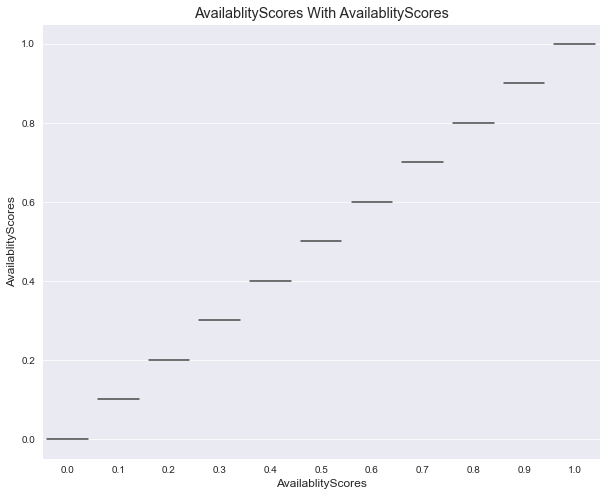

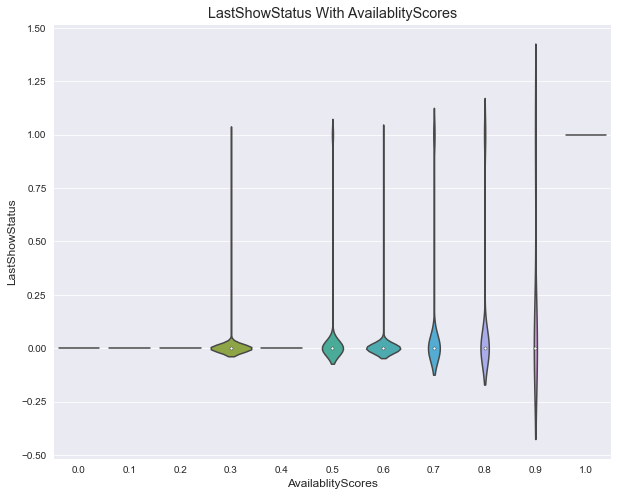

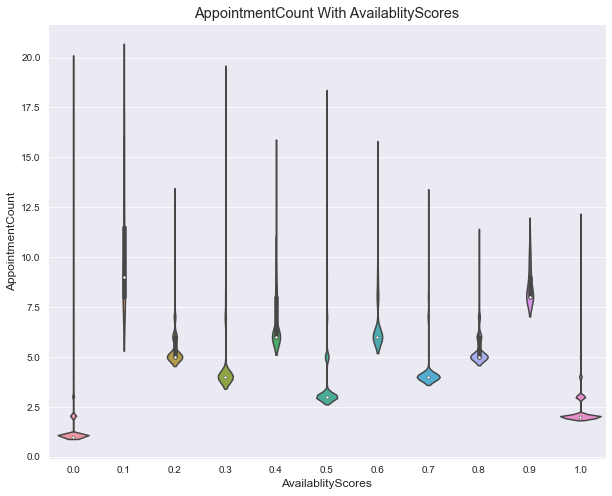

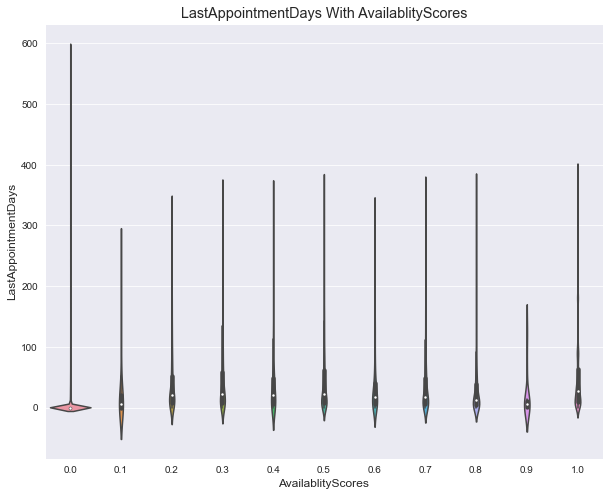

In [452]:
cols = appt_df1.columns[:15]
for item in cols:
    plt.figure(figsize=(10, 8))
    plt.title(str(item) + ' With' + ' AvailablityScores')
    sns.violinplot(x=appt_df1.AvailablityScores, y=appt_df1[item], data=appt_df1)
    plt.show()

In [1]:
'''cols = appt_df1.columns[:22]
for item in cols:
    sns.jointplot(x=appt_df1.AvailablityScores, y=appt_df1[item], data=appt_df1, kind='reg')'''

"cols = appt_df1.columns[:22]\nfor item in cols:\n    sns.jointplot(x=appt_df1.AvailablityScores, y=appt_df1[item], data=appt_df1, kind='reg')"

### **Splitting the dataset**

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.25,random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.3,random_state = 42)

In [330]:
print('X_train.shape :', X_train.shape)
print('y_train.shape :', y_train.shape)
print('X_val.shape :', X_val.shape)
print('y_val.shape :', y_val.shape)
print('X_test.shape :', X_test.shape)
print('y_test :', y_test.shape)

X_train.shape : (59144, 2)
y_train.shape : (59144,)
X_val.shape : (25348, 2)
y_val.shape : (25348,)
X_test.shape : (28164, 2)
y_test : (28164,)


In [331]:
X_val

,Gender,Age
35539,1,25
81079,0,54
56592,0,53
114339,0,34
130529,0,61
...,...,...
131571,0,23
135057,1,75
7727,1,54
105567,0,63


### **Numeric and Categorical Data**

In [332]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [333]:
numeric_cols

['Gender', 'Age']

In [334]:
categorical_cols

[]

### **Scaling numerical columns**

In [335]:
from sklearn.preprocessing import MinMaxScaler

In [336]:
scaler = MinMaxScaler()

In [337]:
scaler.fit(X_train[numeric_cols])

MinMaxScaler()

In [338]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [339]:
X_train.head()

,Gender,Age
44003,1.0,0.617391
59858,1.0,0.365217
74657,0.0,0.521739
150546,0.0,0.460870
102519,0.0,0.304348


In [340]:
X_val.head()

,Gender,Age
35539,1.0,0.208696
81079,0.0,0.460870
56592,0.0,0.452174
114339,0.0,0.286957
130529,0.0,0.521739


### **Encoding categorical columns**

In [341]:
#X_train['Gender'] = X_train['Gender'].map({'Male':1,'Female':0})
#X_val['Gender'] = X_val['Gender'].map({'Male':1,'Female':0})

In [342]:
#X_train['AppointmentStatus'] = X_train['AppointmentStatus'].map({'ACTIVE':1,'COMPLETE':0})
#X_val['AppointmentStatus'] = X_val['AppointmentStatus'].map({'ACTIVE':1,'COMPLETE':0})

In [343]:
X_train.head()

,Gender,Age
44003,1.0,0.617391
59858,1.0,0.365217
74657,0.0,0.521739
150546,0.0,0.460870
102519,0.0,0.304348


In [344]:
X_val.head()

,Gender,Age
35539,1.0,0.208696
81079,0.0,0.460870
56592,0.0,0.452174
114339,0.0,0.286957
130529,0.0,0.521739


## **Evaluating Different Classifiers With Default Parameters**

Scikit-learn offers the following cheatsheet to decide which model to pick.



In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [346]:
#model evaluation function
def eval_pred(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds,pos_label= 1)
    recall = recall_score(y_true,y_preds,pos_label=1)
    f1 = f1_score(y_true,y_preds,pos_label=1)
    #dict to store predictions
    eval_metrics = {'accuracy': round(accuracy,2),'precision' : round(precision,2),'recall': round(recall,2),'f1': round(f1,2)}
    
    print(f'Accuracy:{accuracy * 100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'f1 {f1:.2f}')
    
    return eval_metrics
     

### **Logistic Regression**

In [347]:
Lr=(LogisticRegression())

In [348]:
Lr.fit(X_train, y_train)

LogisticRegression()

In [349]:
X_val

,Gender,Age
35539,1.0,0.208696
81079,0.0,0.460870
56592,0.0,0.452174
114339,0.0,0.286957
130529,0.0,0.521739
...,...,...
131571,0.0,0.191304
135057,1.0,0.643478
7727,1.0,0.460870
105567,0.0,0.539130


In [87]:
val_preds = Lr.predict(X_val)

In [88]:
val_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
y_val

12891     1
45599     0
98673     0
75978     1
147273    0
         ..
111773    0
102204    0
63160     0
56051     1
121836    1
Name: IsArrived, Length: 25364, dtype: int64

In [90]:
Lr_metrics = eval_pred(y_val,val_preds)

Accuracy:68.21%
Precision:0.00
Recall:0.00
f1 0.00


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **LinearSVC**

In [91]:
Lin_SVC = (LinearSVC())

In [92]:
Lin_SVC.fit(X_train, y_train)

LinearSVC()

In [93]:
val_preds = Lin_SVC.predict(X_val)

In [94]:
Lin_SVC_metrics = eval_pred(y_val,val_preds)

Accuracy:68.21%
Precision:0.00
Recall:0.00
f1 0.00


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Decision Tree**

In [95]:
Dt = DecisionTreeClassifier()

In [96]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
val_preds = Dt.predict(X_val)

In [98]:
Dt_metrics = eval_pred(y_val,val_preds)

Accuracy:68.28%
Precision:0.52
Recall:0.03
f1 0.06


### **Random Forest**

In [99]:
Rf = (RandomForestClassifier()).fit(X_train,y_train)

In [100]:
val_preds = Rf.predict(X_val)

In [101]:
Rf_metrics = eval_pred(y_val,val_preds)

Accuracy:68.29%
Precision:0.52
Recall:0.03
f1 0.06


### **KNeighbours**

In [102]:
KN = (KNeighborsClassifier()).fit(X_train,y_train)

In [103]:
val_preds = KN.predict(X_val)

In [104]:
KN_metrics = eval_pred(y_val,val_preds)

Accuracy:60.69%
Precision:0.34
Recall:0.25
f1 0.29


### Comparing the Different Metrics Results


In [105]:
model_results = pd.DataFrame({'LinearRegression': Lr_metrics,
                              'LinearSVC' : Lin_SVC_metrics,
                              'DecisionTree': Dt_metrics,
                              'RandomForest' : Rf_metrics,
                              'KNeighbours' : KN_metrics})
model_results

,LinearRegression,LinearSVC,DecisionTree,RandomForest,KNeighbours
accuracy,0.68,0.68,0.68,0.68,0.61
precision,0.00,0.00,0.52,0.52,0.34
recall,0.00,0.00,0.03,0.03,0.25
f1,0.00,0.00,0.06,0.06,0.29


The dataset is imbalanced therefore we will use `f1 score` to evaluate the performance of our models. It is calculated from the precision and recall of the test.The highest possible value of an `f1 score` is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.The formula for calculating `f1 score` is as follows:

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

`Precision` is the ratio of accurately predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

`Recall` is the ratio of accurately predicted positive observations to all observations in actual class – yes.

Recall = TP/TP+FN

Best performers Decision Tree, Random forest and KNeighbours. We will use Decision Tree and Random Forest for hyperparameter tuning.

## **Hyperparameter tuning**

### **RandomizedSearchCV**

### Random Forest

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
Rf_grid = {'n_estimators' : [100,200,300,400,500],
         'max_features': ['sqrt', 'log2']}       

In [108]:
Rf_grid = {'n_estimators' : [100,200,300,400,500],
         'max_features': ['sqrt', 'log2']}       

In [109]:
Rf_clf = RandomForestClassifier(n_jobs =1,class_weight='balanced')

In [110]:
Randsearch_Rf = RandomizedSearchCV(estimator = Rf_clf, param_distributions = Rf_grid, n_iter= 5,cv=5,verbose=2)

In [111]:
Randsearch_Rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................max_features=sqrt, n_estimators=300; total time=   4.7s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   4.8s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   4.7s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   5.0s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   5.7s
[CV] END ................max_features=log2, n_estimators=200; total time=   3.6s
[CV] END ................max_features=log2, n_estimators=200; total time=   3.2s
[CV] END ................max_features=log2, n_estimators=200; total time=   3.4s
[CV] END ................max_features=log2, n_estimators=200; total time=   3.3s
[CV] END ................max_features=log2, n_estimators=200; total time=   3.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   5.0s
[CV] END ................max_features=log2, n_est

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=1),
                   n_iter=5,
                   param_distributions={'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [112]:
#Combinations with best parameters
Randsearch_Rf.best_params_

{'n_estimators': 300, 'max_features': 'sqrt'}

In [113]:
#X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [114]:
#X_test['Gender'] = X_test['Gender'].map({'M':1,'F':0})

In [115]:
Rf_clf_preds2 =Randsearch_Rf.predict(X_val)

In [116]:
Rf_clf_metrics = eval_pred(y_val,Rf_clf_preds2)

Accuracy:58.93%
Precision:0.36
Recall:0.39
f1 0.38


### KN tuning

In [117]:
Kn_grid = {'n_neighbors': range(1,17,3),
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski']}

Kn_clf = KNeighborsClassifier(n_jobs =1)

In [118]:
Randsearch_Kn = RandomizedSearchCV(estimator = Kn_clf, param_distributions = Kn_grid,cv=3,verbose=2)

In [119]:
Randsearch_Kn.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.6s
[CV] END ..metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.5s
[CV] END ..metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.6s
[CV] END .metric=minkowski, n_neighbors=13, weights=distance; total time=   0.1s
[CV] END .metric=minkowski, n_neighbors=13, weights=distance; total time=   0.1s
[CV] END .metric=minkowski, n_neighbors=13, weights=distance; total time=   0.2s
[CV] END .metric=minkowski, n_neighbors=10, weights=distance; total time=   0.1s
[CV] END .metric=minkowski, n_neighbors=10, weights=distance; total time=   0.1s
[CV] END .metric=minkowski, n_neighbors=10, weig

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=1),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 17, 3),
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [120]:
Randsearch_Kn.best_params_

{'weights': 'uniform', 'n_neighbors': 16, 'metric': 'manhattan'}

In [121]:
Kn_clf_preds2 =Randsearch_Kn.predict(X_val)

In [122]:
Kn_clf_metrics = eval_pred(y_val,Kn_clf_preds2)

Accuracy:66.72%
Precision:0.39
Recall:0.08
f1 0.14


### Decision Tree

In [123]:
Dt_grid = {'max_depth' : [7,9,11,12,15],
           'min_samples_leaf':[1,2,3,4,5],
           'max_features':["auto","log2","sqrt",None],
           'max_leaf_nodes':[None,40,50,60,70,90] }

In [124]:
Dt_clf = DecisionTreeClassifier()

In [125]:
Randsearch_Dt = RandomizedSearchCV(estimator= Dt_clf, param_distributions = Dt_grid,cv=3,n_jobs=1,verbose=3)

In [126]:
Randsearch_Dt.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1;, score=0.685 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1;, score=0.683 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1;, score=0.684 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2;, score=0.685 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2;, score=0.685 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2;, score=0.684 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1;, score=0.684 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1;, score=0.684 total time=   0.0s
[C

D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: 

[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1;, score=0.685 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1;, score=0.684 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1;, score=0.686 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1;, score=0.686 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1;, score=0.685 total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [7, 9, 11, 12, 15],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 40, 50, 60, 70,
                                                           90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5]},
                   verbose=3)

In [127]:
Randsearch_Dt.best_params_

{'min_samples_leaf': 1,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 12}

In [128]:
Dt_clf_preds2 =Randsearch_Kn.predict(X_val)

In [129]:
Dt_clf_metrics = eval_pred(y_val,Dt_clf_preds2)

Accuracy:66.72%
Precision:0.39
Recall:0.08
f1 0.14


### **Comparing Results from Hyperparameter Tuning**

In [130]:
tuning_results = pd.DataFrame({'DecisionTree': Dt_clf_metrics,
                              'RandomForest' : Rf_clf_metrics,
                              'KNeighbours' : Kn_clf_metrics})
tuning_results

,DecisionTree,RandomForest,KNeighbours
accuracy,0.67,0.59,0.67
precision,0.39,0.36,0.39
recall,0.08,0.39,0.08
f1,0.14,0.38,0.14


### **Make Prediction with Test**

In [131]:
X_test

,Gender,Age
87349,Female,74
135049,Male,58
35318,Male,78
7376,Female,46
24274,Female,50
...,...,...
93302,Male,45
26729,Female,72
130333,Female,43
89286,Male,36


In [132]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [133]:
X_test['Gender'] = X_test['Gender'].map({'Male':1,'Female':0})

In [134]:
X_test.head()

,Gender,Age
87349,0.0,0.637931
135049,1.0,0.500000
35318,1.0,0.672414
7376,0.0,0.396552
24274,0.0,0.431034


In [135]:
test_preds = Randsearch_Rf.predict(X_test)

In [136]:
test_preds_metrics = eval_pred(y_test,test_preds)

Accuracy:59.19%
Precision:0.37
Recall:0.39
f1 0.38


In [137]:
test_preds_metrics = eval_pred(y_test,test_preds)

Accuracy:59.19%
Precision:0.37
Recall:0.39
f1 0.38


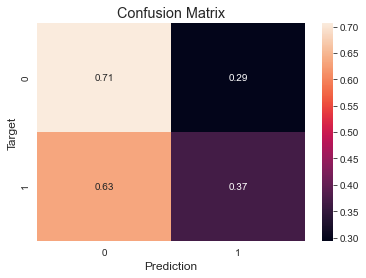

In [138]:
cf=confusion_matrix(test_preds, y_test,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix');
    